Cars Prices with Multiple Linear Regression and RFE<br>
Problem Description<br>
A Chinese automobile company Teclov_chinese aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:

• Which variables are significant in predicting the price of a car

• How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

Business Goal
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to understand the pricing dynamics of a new market. Data Preparation

• There is a variable named CarName which is comprised of two parts:

the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. You need to consider only company name as the independent variable for model building.

DATA DICTONARY						
						
1	Car_ID:    			Unique id of each observation (Interger)		
2	Symboling 			Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 		
3	carCompany			Name of car company (Categorical)		
4	fueltype			Car fuel type i.e gas or diesel (Categorical)		
5	aspiration			Aspiration used in a car (Categorical)		
6	doornumber			Number of doors in a car (Categorical)		
7	carbody			body of car (Categorical)		
8	drivewheel			type of drive wheel (Categorical)		
9	enginelocation			Location of car engine (Categorical)		
10	wheelbase			Weelbase of car (Numeric)		
11	carlength			Length of car (Numeric)		
12	carwidth			Width of car (Numeric)		
13	carheight			height of car (Numeric)		
14	curbweight			The weight of a car without occupants or baggage. (Numeric)		
15	enginetype			Type of engine. (Categorical)		
16	cylindernumber			cylinder placed in the car (Categorical)		
17	enginesize			Size of car (Numeric)		
18	fuelsystem			Fuel system of car (Categorical)		
19	boreratio			Boreratio of car (Numeric)		
20	stroke			Stroke or volume inside the engine (Numeric)		
21	compressionratio			compression ratio of car (Numeric)		
22	horsepower			Horsepower (Numeric)		
23	peakrpm			car peak rpm (Numeric)		
24	citympg			Mileage in city (Numeric)		
25	highwaympg			Mileage on highway (Numeric)		
26	price(Dependent variable)			Price of car (Numeric)		
						
						**Source: https://archive.ics.uci.edu/ml/datasets/Automobile


In [266]:
import numpy as np
import pandas as pd

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from scipy.stats import boxcox
pd.options.display.max_rows = 50
pd.options.display.max_columns = 999

In [268]:
df = pd.read_csv("CarPrice_Assignment.csv", index_col = 0)

In [269]:
df.tail(10)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
196,-1,volvo 144ea,gas,std,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3034,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415.0
197,-2,volvo 244dl,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,2935,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985.0
198,-1,volvo 245,gas,std,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3042,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515.0
199,-2,volvo 264gl,gas,turbo,four,sedan,rwd,front,104.3,188.8,67.2,56.2,3045,ohc,four,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420.0
200,-1,volvo diesel,gas,turbo,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3157,ohc,four,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950.0
201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [270]:
# Delete symboling


In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [272]:
df["symboling"].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [273]:
#Splitting company name from CarName column
df['CompanyName'] = df['CarName'].apply(lambda x: x.split()[0])


In [274]:
df.drop('CarName', axis = "columns",inplace = True)


In [275]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [276]:
df["CompanyName"].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
vokswagen       1
mercury         1
porcshce        1
toyouta         1
Nissan          1
Name: CompanyName, dtype: int64

In [277]:
carname ={"Nissan":"nissan", "maxda":"mazda", "vokswagen": "volkswagen", "toyouta": "toyota", "porcshce":"porsche", "vw":"volkswagen"}


In [278]:
df["CompanyName"].replace(carname, inplace = True)


In [279]:
df["CompanyName"].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
volvo          11
peugeot        11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
chevrolet       3
jaguar          3
alfa-romero     3
renault         2
mercury         1
Name: CompanyName, dtype: int64

In [ ]:
df["CompanyName"].value_counts()

## Visualizing the data

In [280]:
import warnings
warnings.filterwarnings('ignore')


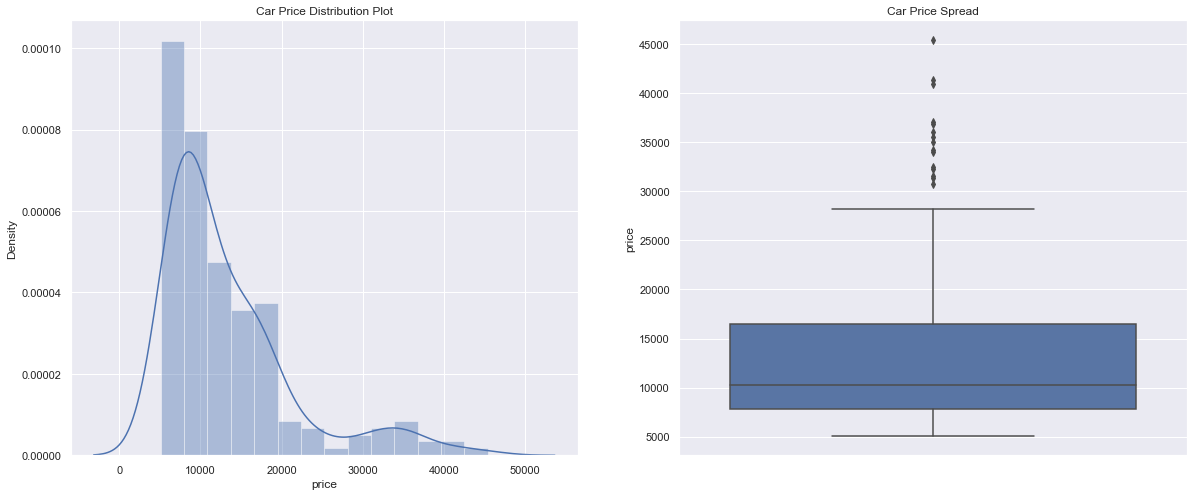

In [281]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.price)

plt.show();

#### Quantile method to catch outliers
#### Define a function to find the outlier thresholds

In [282]:

# According to data structure, business area different quartiles like 0.05, 0.95 can be selected, too.
# For linear models (LinearRegression, LogisticRegression, KNN), ANN, CNN, etc. we need to analyse outliers and missing values.
# However, for tree models we do not need to detect outliers, because they are robust to outlier and missing values. 

In [283]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [284]:
up = outlier_thresholds(df, "price")[1]


In [285]:
up

29575.5

In [286]:
mask = (df['price'] > up)


In [287]:
df['price'][mask]


car_ID
16     30760.0
17     41315.0
18     36880.0
48     32250.0
49     35550.0
50     36000.0
71     31600.0
72     34184.0
73     35056.0
74     40960.0
75     45400.0
127    32528.0
128    34028.0
129    37028.0
130    31400.5
Name: price, dtype: float64

In [288]:
df['price'][mask] = np.median(df['price'])


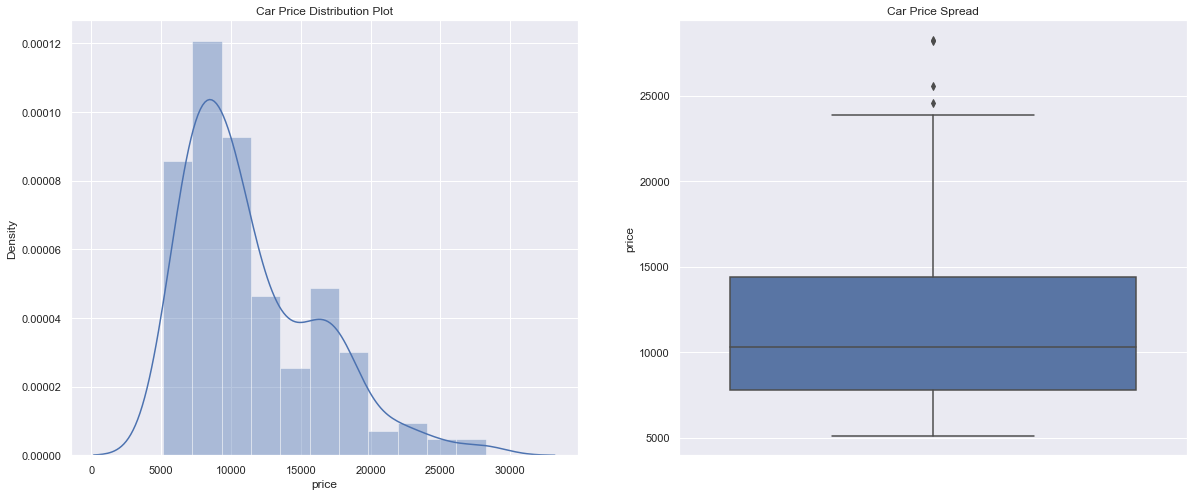

In [289]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.price)

plt.show();

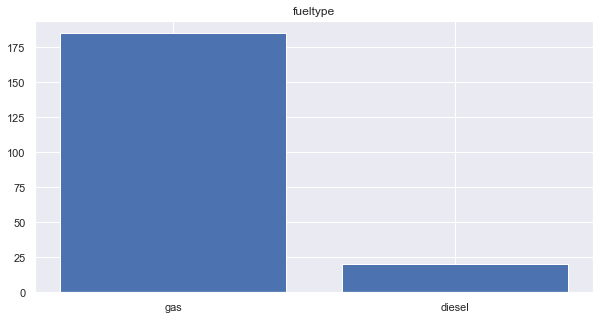

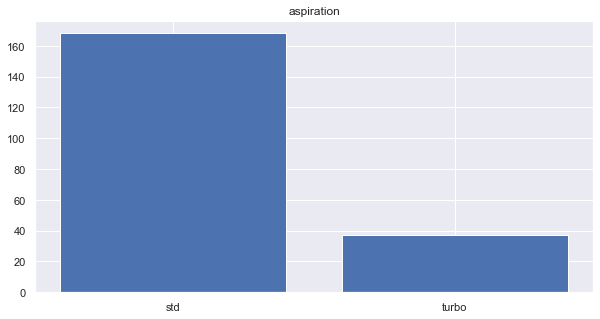

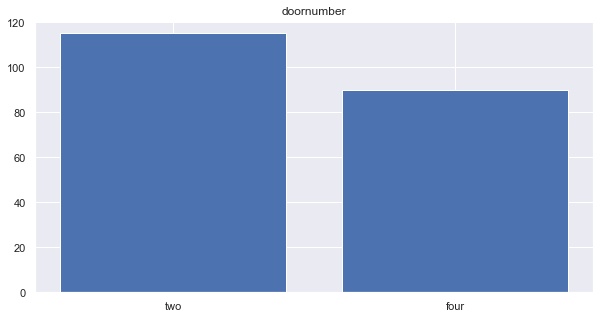

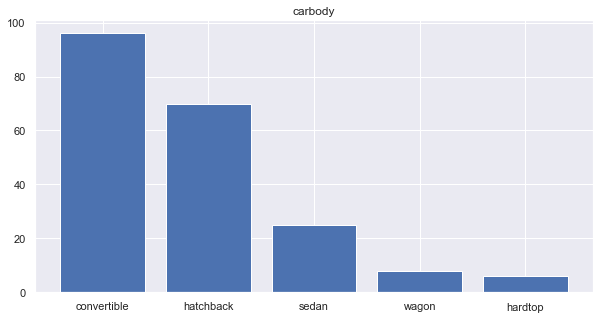

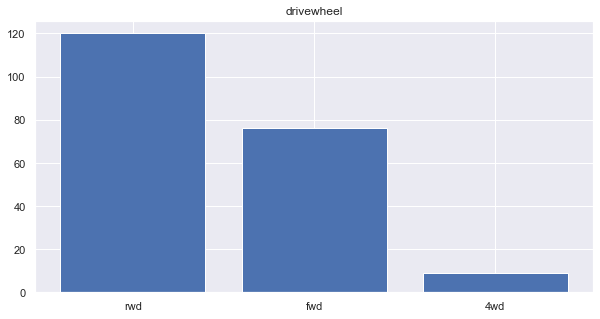

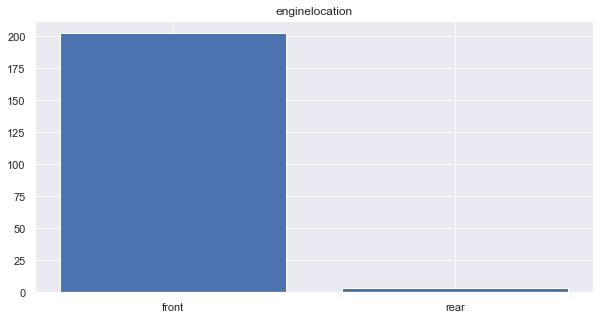

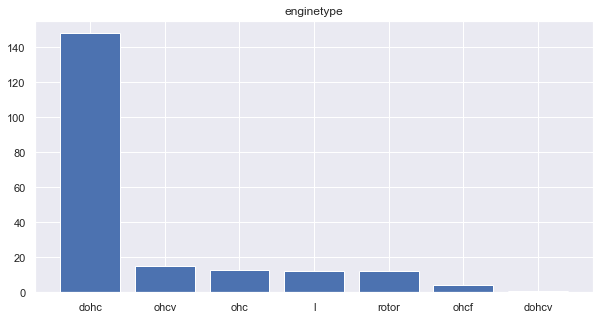

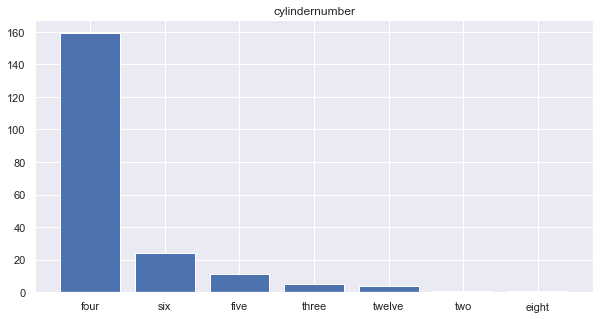

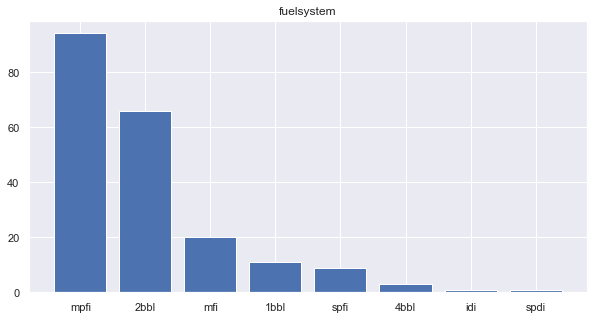

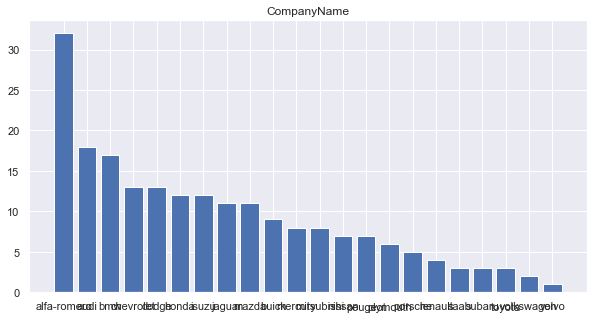

In [290]:
for c in df.select_dtypes(object):
    plt.figure(figsize=(10,5))
    plt.bar(df[c].unique(), df[c].value_counts())
    plt.title(c)
    plt.show();

In [291]:
df['CompanyName'].value_counts()


toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
volvo          11
peugeot        11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
chevrolet       3
jaguar          3
alfa-romero     3
renault         2
mercury         1
Name: CompanyName, dtype: int64

In [180]:
dir(df['CompanyName'].value_counts())


['T',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__

<BarContainer object of 22 artists>

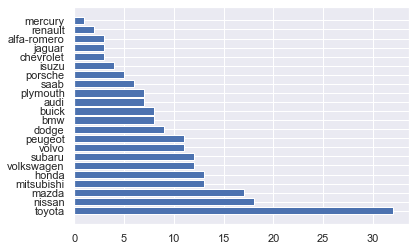

In [292]:
plt.barh(df['CompanyName'].value_counts().index,  df['CompanyName'].value_counts().values)


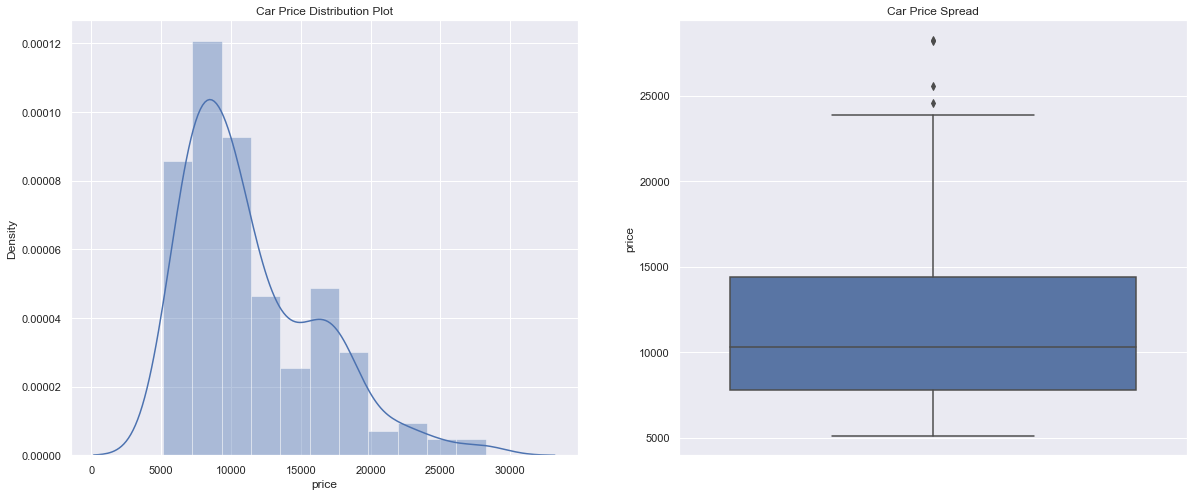

In [293]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.price)

plt.show();

<AxesSubplot:xlabel='compressionratio', ylabel='Density'>

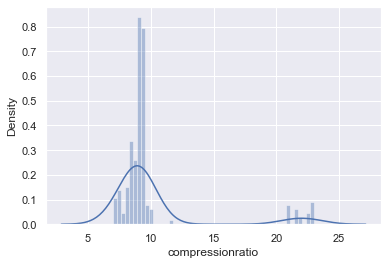

In [294]:
sns.distplot(df['compressionratio'])


<AxesSubplot:xlabel='wheelbase', ylabel='Density'>

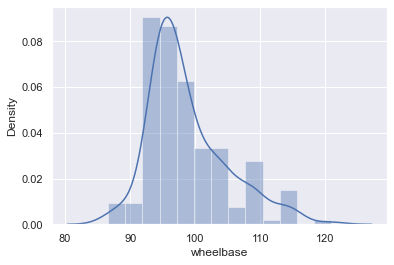

In [308]:
sns.distplot(df['wheelbase'])

<AxesSubplot:xlabel='carlength', ylabel='Density'>

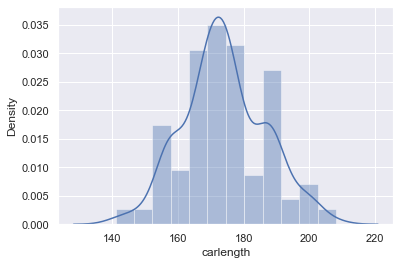

In [309]:
sns.distplot(df['carlength'])

<AxesSubplot:xlabel='carwidth', ylabel='Density'>

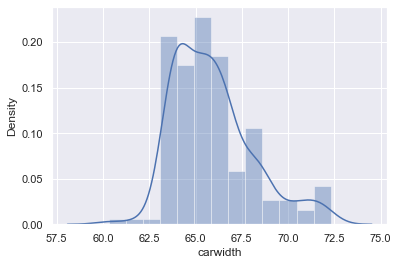

In [310]:
sns.distplot(df['carwidth'])

<AxesSubplot:xlabel='carheight', ylabel='Density'>

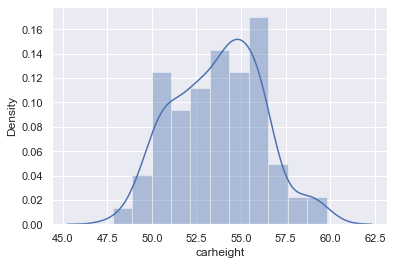

In [311]:
sns.distplot(df['carheight'])

<AxesSubplot:xlabel='curbweight', ylabel='Density'>

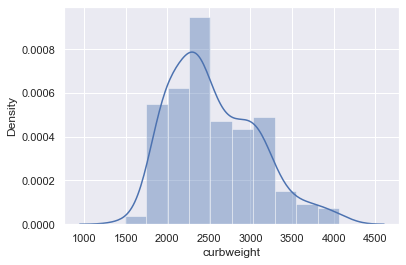

In [312]:
sns.distplot(df['curbweight'])

<AxesSubplot:xlabel='enginesize', ylabel='Density'>

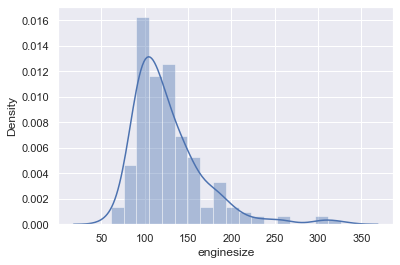

In [313]:
sns.distplot(df['enginesize'])

<AxesSubplot:xlabel='boreratio', ylabel='Density'>

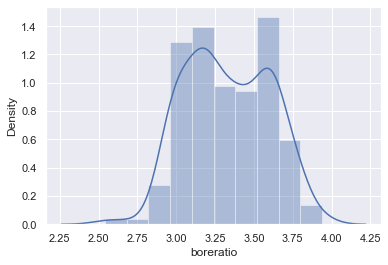

In [314]:
sns.distplot(df['boreratio'])

<AxesSubplot:xlabel='stroke', ylabel='Density'>

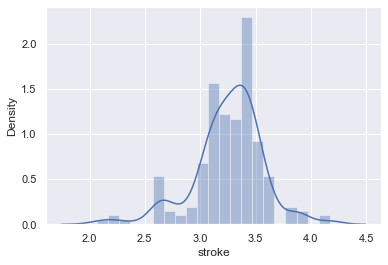

In [315]:
sns.distplot(df['stroke'])

<AxesSubplot:xlabel='horsepower', ylabel='Density'>

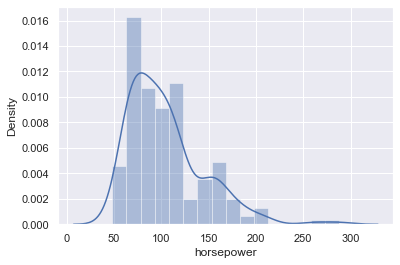

In [316]:
sns.distplot(df['horsepower'])

<AxesSubplot:xlabel='peakrpm', ylabel='Density'>

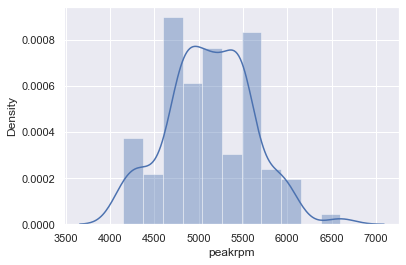

In [317]:
sns.distplot(df['peakrpm'])

<AxesSubplot:xlabel='citympg', ylabel='Density'>

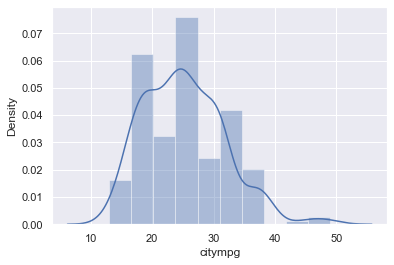

In [318]:
sns.distplot(df['citympg'])

<AxesSubplot:xlabel='highwaympg', ylabel='Density'>

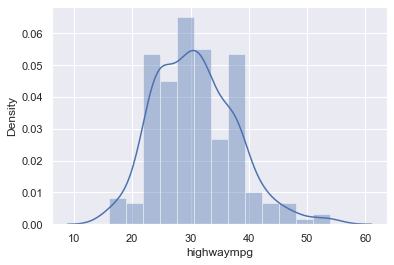

In [319]:
sns.distplot(df['highwaympg'])

In [320]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from scipy.stats import boxcox
pd.options.display.max_rows = 50
pd.options.display.max_columns = 999

What is a Box Cox Transformation?
A Box Cox transformation is a transformation of non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn’t normal, applying a Box-Cox means that you are able to run a broader number of tests.

In [323]:
#comp=boxcox(df['compressionratio'],lmbda=0.02)

ValueError: Data must be positive.

<AxesSubplot:ylabel='Count'>

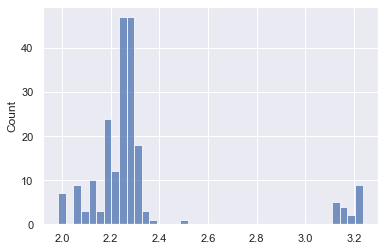

In [324]:
sns.histplot(comp)

<AxesSubplot:ylabel='Density'>

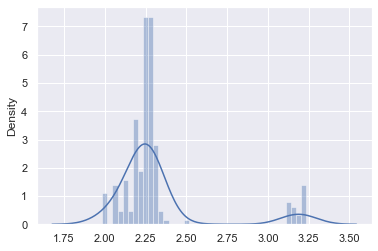

In [325]:
sns.distplot(comp)

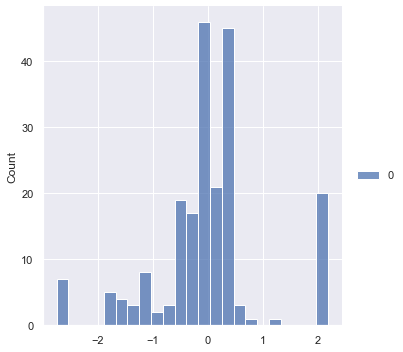

In [326]:
pt = PowerTransformer()
compres=pt.fit_transform(df['compressionratio'].to_numpy().reshape(-1,1))
sns.displot(compres)

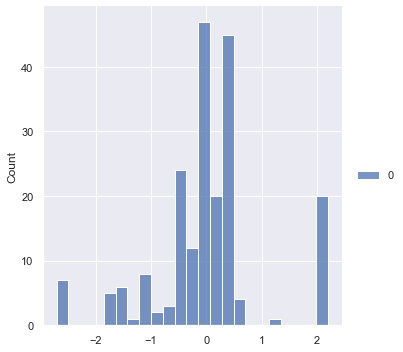

In [300]:
pt = PowerTransformer()
cost=pt.fit_transform(df['compressionratio'].to_numpy().reshape(-1,1))
sns.displot(cost)

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html 


In [327]:
df['compressionratio'] = cost


In [328]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,-0.014205,111,5000,21,27,13495.0,alfa-romero
2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,-0.014205,111,5000,21,27,16500.0,alfa-romero
3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,-0.014205,154,5000,19,26,16500.0,alfa-romero
4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,0.638775,102,5500,24,30,13950.0,audi
5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,-1.035191,115,5500,18,22,17450.0,audi


In [305]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,2.050000e+02,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,2.002807e-13,104.117073,5125.121951,25.219512,30.751220,11420.542278
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,1.002448e+00,39.544167,476.985643,6.542142,6.886443,4792.790228
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,-2.713927e+00,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,-3.665123e-01,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,-1.420497e-02,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,2.806610e-01,116.000000,5500.000000,30.000000,34.000000,14399.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,2.204184e+00,288.000000,6600.000000,49.000000,54.000000,28248.000000


In [329]:
replaced_dict = {-2:5, -1:4, 0:3, 1:2, 2:1, 3:0}


In [330]:
df['symboling'] = df['symboling'].replace(replaced_dict)


In [332]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,-0.014205,111,5000,21,27,13495.0,alfa-romero
2,0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,-0.014205,111,5000,21,27,16500.0,alfa-romero
3,2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,-0.014205,154,5000,19,26,16500.0,alfa-romero
4,1,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,0.638775,102,5500,24,30,13950.0,audi
5,1,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,-1.035191,115,5500,18,22,17450.0,audi


In [306]:
# df.drop('symboling', axis="columns", inplace = True)


In [331]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,2.050000e+02,205.000000,205.000000,205.000000,205.000000,205.000000
mean,2.165854,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,2.002807e-13,104.117073,5125.121951,25.219512,30.751220,11420.542278
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,1.002448e+00,39.544167,476.985643,6.542142,6.886443,4792.790228
min,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,-2.713927e+00,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,1.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,-3.665123e-01,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,2.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,-1.420497e-02,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,3.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,2.806610e-01,116.000000,5500.000000,30.000000,34.000000,14399.000000
max,5.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,2.204184e+00,288.000000,6600.000000,49.000000,54.000000,28248.000000


In [ ]:
# we should do ordinals encoding to Symboling

In [55]:
def transform_all(df):
    pt = PowerTransformer()
    for i in df.describe().columns:
        if i != 'price':
            newseries = pt.fit_transform(df[i]).to_numpy().reshape(-1, 1)
            df[i] = newseries
    return df



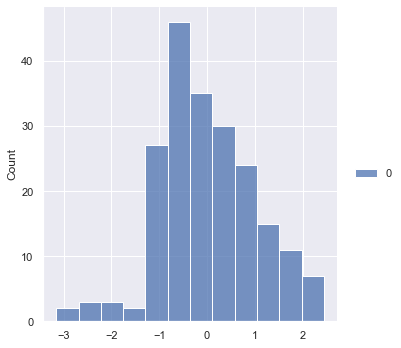

In [58]:
pt = PowerTransformer()
wheelbase=pt.fit_transform(df['wheelbase'].to_numpy().reshape(-1,1))
sns.displot(wheelbase)

In [59]:
wheelbase.shape


(205, 1)

In [60]:
wheelbase


array([[-2.40241832],
       [-2.40241832],
       [-0.69984897],
       [ 0.36500138],
       [ 0.29626638],
       [ 0.36500138],
       [ 1.22118427],
       [ 1.22118427],
       [ 1.22118427],
       [ 0.31361014],
       [ 0.59287056],
       [ 0.59287056],
       [ 0.59287056],
       [ 0.59287056],
       [ 0.92818041],
       [ 0.92818041],
       [ 0.92818041],
       [ 1.66639724],
       [-2.47276236],
       [-0.69984897],
       [-0.69984897],
       [-0.89387513],
       [-0.89387513],
       [-0.89387513],
       [-0.89387513],
       [-0.89387513],
       [-0.89387513],
       [-0.89387513],
       [ 0.90080019],
       [-0.3833319 ],
       [-3.15151612],
       [-3.15151612],
       [-0.89387513],
       [-0.89387513],
       [-0.89387513],
       [-0.25604057],
       [-0.25604057],
       [-0.25604057],
       [-0.25604057],
       [-0.25604057],
       [-0.25604057],
       [-0.25604057],
       [-0.25604057],
       [-0.74742654],
       [-0.69984897],
       [-0

In [61]:
wheelbase.ndim


2

In [62]:
df['wheelbase']


car_ID
1       88.6
2       88.6
3       94.5
4       99.8
5       99.4
       ...  
201    109.1
202    109.1
203    109.1
204    109.1
205    109.1
Name: wheelbase, Length: 205, dtype: float64

In [63]:
df['wheelbase'] = wheelbase


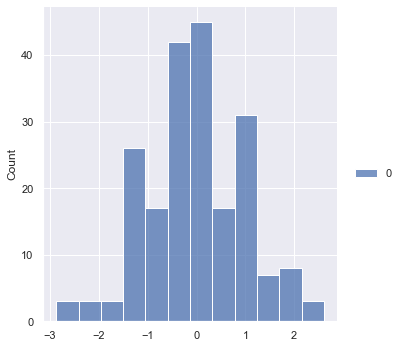

In [64]:
pt = PowerTransformer()
carlength=pt.fit_transform(df['carlength'].to_numpy().reshape(-1,1))
sns.displot(carlength)

In [65]:
df['carlength'] = carlength


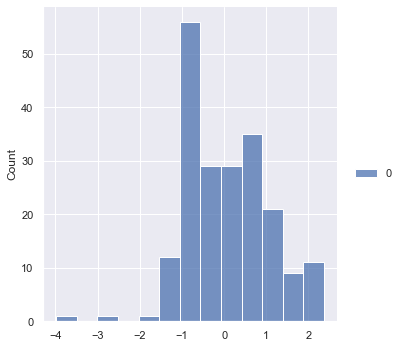

In [66]:
pt = PowerTransformer()
carwidth=pt.fit_transform(df['carwidth'].to_numpy().reshape(-1,1))
sns.displot(carwidth)

In [67]:
df['carwidth'] = carwidth

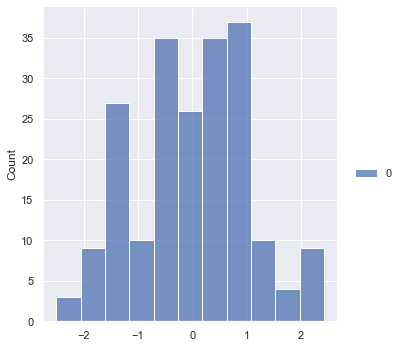

In [68]:
pt = PowerTransformer()
carheight=pt.fit_transform(df['carheight'].to_numpy().reshape(-1,1))
sns.displot(carheight)

In [69]:
df['carheight'] = carheight

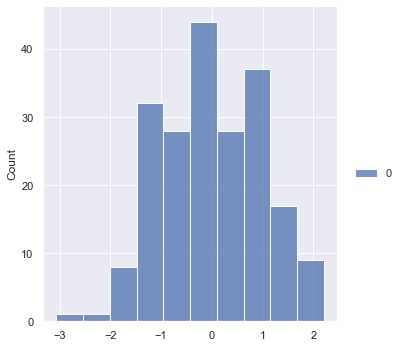

In [70]:
pt = PowerTransformer()
curbweight=pt.fit_transform(df['curbweight'].to_numpy().reshape(-1,1))
sns.displot(curbweight)

In [71]:
df['curbweight'] = curbweight

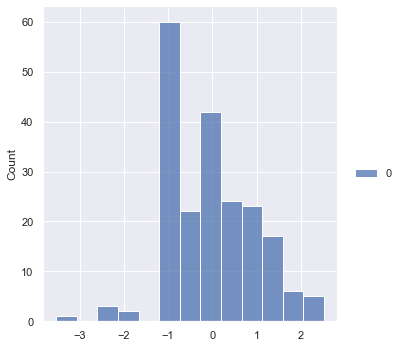

In [72]:
pt = PowerTransformer()
enginesize=pt.fit_transform(df['enginesize'].to_numpy().reshape(-1,1))
sns.displot(enginesize)

In [73]:
df['enginesize'] = enginesize

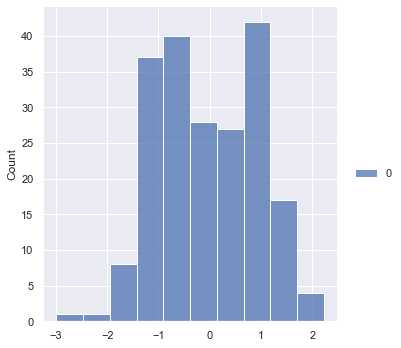

In [74]:
pt = PowerTransformer()
boreratio=pt.fit_transform(df['boreratio'].to_numpy().reshape(-1,1))
sns.displot(boreratio)

In [75]:
df['boreratio'] = boreratio

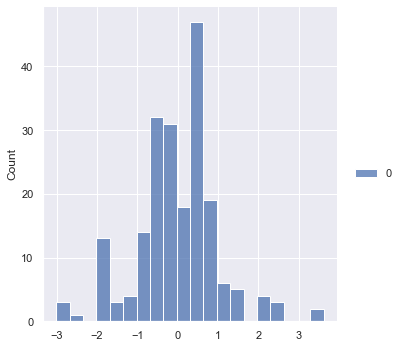

In [76]:
pt = PowerTransformer()
stroke=pt.fit_transform(df['stroke'].to_numpy().reshape(-1,1))
sns.displot(stroke)

In [77]:
df['stroke'] = stroke

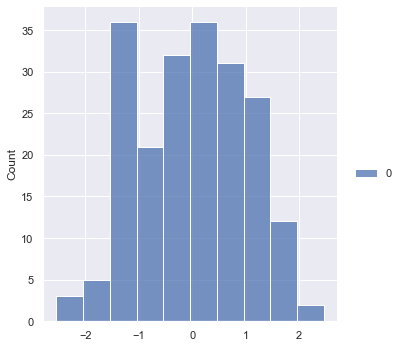

In [78]:
pt = PowerTransformer()
horsepower=pt.fit_transform(df['horsepower'].to_numpy().reshape(-1,1))
sns.displot(horsepower)

In [79]:
df['horsepower'] = horsepower

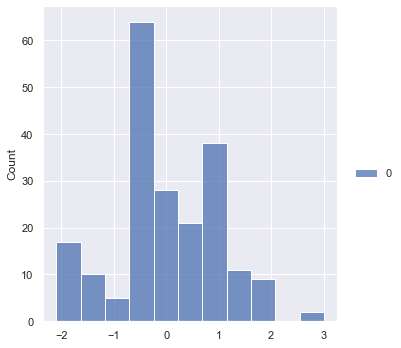

In [80]:
pt = PowerTransformer()
peakrpm=pt.fit_transform(df['peakrpm'].to_numpy().reshape(-1,1))
sns.displot(peakrpm)

In [81]:
df['peakrpm'] = peakrpm

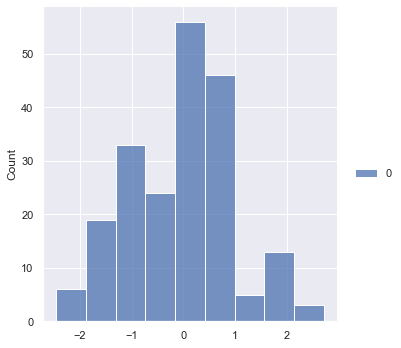

In [82]:
pt = PowerTransformer()
citympg=pt.fit_transform(df['citympg'].to_numpy().reshape(-1,1))
sns.displot(citympg)

In [83]:
df['citympg'] = citympg

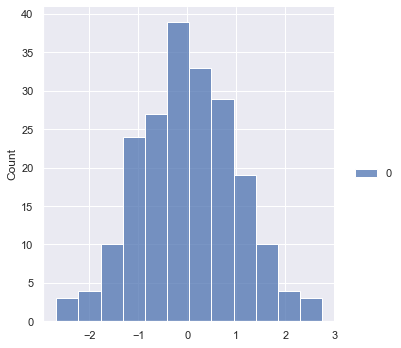

In [84]:
pt = PowerTransformer()
highwaympg=pt.fit_transform(df['highwaympg'].to_numpy().reshape(-1,1))
sns.displot(highwaympg)

In [85]:
df['highwaympg'] = highwaympg

In [187]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,11420.542278
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,4792.790228
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,14399.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,28248.000000


In [333]:
a = list()
for i in df.describe().columns:
    a.append(i)
numericals = df[a]


In [334]:
numericals


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,
1,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,-0.014205,111,5000,21,27,13495.0
2,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,-0.014205,111,5000,21,27,16500.0
3,2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,-0.014205,154,5000,19,26,16500.0
4,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,0.638775,102,5500,24,30,13950.0
5,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,-1.035191,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,4,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,0.346758,114,5400,23,28,16845.0
202,4,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,-0.272332,160,5300,19,25,19045.0
203,4,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,-0.182371,134,5500,18,23,21485.0


                  symboling  wheelbase  carlength  carwidth  carheight  \
symboling          1.000000   0.531954   0.357612  0.232919   0.541038   
wheelbase          0.531954   1.000000   0.874587  0.795144   0.589435   
carlength          0.357612   0.874587   1.000000  0.841118   0.491029   
carwidth           0.232919   0.795144   0.841118  1.000000   0.279210   
carheight          0.541038   0.589435   0.491029  0.279210   1.000000   
curbweight         0.227691   0.776386   0.877728  0.867032   0.295572   
enginesize         0.105790   0.569329   0.683360  0.735433   0.067149   
boreratio          0.130051   0.488750   0.606454  0.559150   0.171071   
stroke             0.008735   0.160959   0.129533  0.182942  -0.055307   
compressionratio   0.138741   0.083355   0.003299  0.005401   0.214977   
horsepower        -0.070873   0.353294   0.552623  0.640732  -0.108802   
peakrpm           -0.273606  -0.360469  -0.287242 -0.220012  -0.320411   
citympg            0.035823  -0.470414

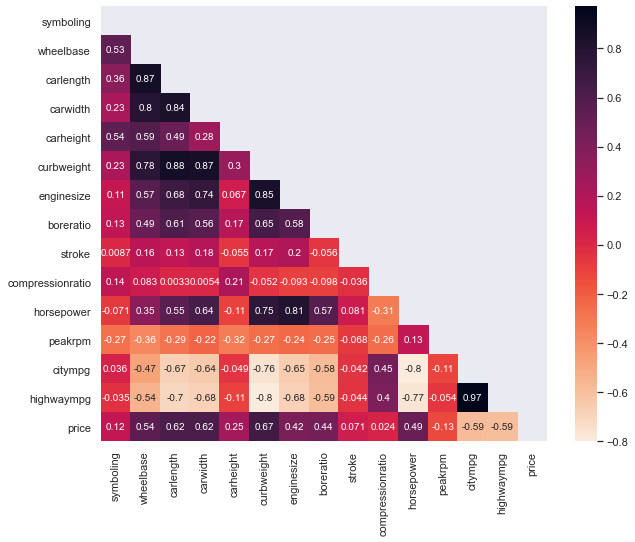

In [335]:
correlations = numericals.corr()
print(correlations)
cmap = sns.cm.rocket_r  ## for reversing the colors
mask=np.zeros_like(numericals.corr())
mask[np.triu_indices_from(mask)]=True
fig, ax=plt.subplots(figsize=(10, 8))
ax=sns.heatmap(numericals.corr(), mask=mask, annot=True,cmap=cmap)
plt.show()

In [141]:
# delete carlenght 
# delete enginesize
# delete highwaympg


In [336]:
# Fuel economy
df['fueleconomy'] = (0.55 * df['citympg']) + (0.45 * df['highwaympg'])

In [337]:
dropped_cols = ['citympg', 'highwaympg']

In [338]:
numericals['fueleconomy'] = df['fueleconomy']


In [203]:
# dropped_cols = ['carlength', 'carwidth', 'enginesize']


In [339]:
numericals.drop(dropped_cols, axis="columns", inplace=True, errors='ignore')


In [340]:
numericals

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,fueleconomy
car_ID,,,,,,,,,,,,,,
1,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,-0.014205,111,5000,13495.0,23.70
2,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,-0.014205,111,5000,16500.0,23.70
3,2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,-0.014205,154,5000,16500.0,22.15
4,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,0.638775,102,5500,13950.0,26.70
5,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,-1.035191,115,5500,17450.0,19.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,4,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,0.346758,114,5400,16845.0,25.25
202,4,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,-0.272332,160,5300,19045.0,21.70
203,4,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,-0.182371,134,5500,21485.0,20.25


In [341]:
Y = numericals['price']


In [342]:
numericals.drop('price', axis='columns', inplace=True)


## Categarical Variable Analysis

In [343]:

categoricals_features = df.select_dtypes(object)
categoricals_features.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,CompanyName
car_ID,,,,,,,,,,
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
3,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
4,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
5,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [344]:
categoricals_features=pd.get_dummies(categoricals_features, drop_first=True)

In [345]:
categoricals_features

,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
202,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
203,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


###  concat numerical and categorical features....

In [346]:
all_features=pd.concat([numericals, categoricals_features], axis=1) # concat numerical and categorical transformations
all_features.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,fueleconomy,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,-0.014205,111,5000,23.70,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,-0.014205,111,5000,23.70,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,-0.014205,154,5000,22.15,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,0.638775,102,5500,26.70,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,-1.035191,115,5500,19.80,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [347]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [262]:
# lm = LinearRegression()
# lm.fit(X_train,y_train)
# rfe = RFE(lm, 10)
# rfe = rfe.fit(X_train, y_train)

In [263]:
# list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 37),
 ('wheelbase', False, 40),
 ('carlength', False, 46),
 ('carwidth', False, 49),
 ('carheight', False, 43),
 ('curbweight', False, 52),
 ('enginesize', False, 51),
 ('boreratio', False, 42),
 ('stroke', False, 39),
 ('compressionratio', False, 31),
 ('horsepower', False, 47),
 ('peakrpm', False, 53),
 ('fueleconomy', False, 45),
 ('fueltype_gas', False, 26),
 ('aspiration_turbo', False, 15),
 ('doornumber_two', False, 32),
 ('carbody_hardtop', False, 12),
 ('carbody_hatchback', False, 9),
 ('carbody_sedan', False, 11),
 ('carbody_wagon', False, 10),
 ('drivewheel_fwd', False, 36),
 ('drivewheel_rwd', False, 23),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', False, 38),
 ('enginetype_l', False, 4),
 ('enginetype_ohc', False, 35),
 ('enginetype_ohcf', False, 6),
 ('enginetype_ohcv', False, 24),
 ('enginetype_rotor', False, 3),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', True, 1),
 ('cylindernumber_thre

In [264]:
# X_train.columns[rfe.support_]

Index(['enginelocation_rear', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve', 'cylindernumber_two',
       'CompanyName_buick', 'CompanyName_mercury', 'CompanyName_porsche',
       'CompanyName_volvo'],
      dtype='object')

In [265]:
# X_train_rfe = X_train[X_train.columns[rfe.support_]]
# X_train_rfe.head()

,enginelocation_rear,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,CompanyName_buick,CompanyName_mercury,CompanyName_porsche,CompanyName_volvo
car_ID,,,,,,,,,,
48,0,0,0,1,0,0,0,0,0,0
46,0,0,1,0,0,0,0,0,0,0
167,0,0,1,0,0,0,0,0,0,0
44,0,0,1,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0


In [348]:
X_train, X_test, y_train, y_test=train_test_split(all_features, Y, test_size=.20)

In [349]:
model=LinearRegression()    # model
model.fit(X_train.to_numpy(), y_train)   # model train
y_pred=model.predict(X_test.to_numpy())   # model prediction
y_pred_train=model.predict(X_train.to_numpy())

In [350]:
model.score(X_test, y_test)


0.6682884890982785

Text(0.5, 1.0, 'Train Residual histogram')

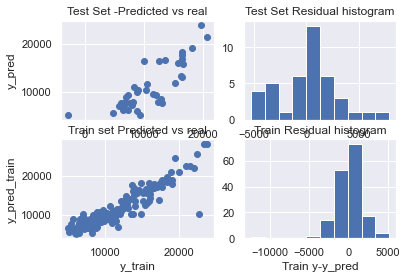

In [351]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(2,2)
ax[0,0].plot(y_pred, y_test, 'o')
ax[0,0].set_xlabel("y_test")
ax[0,0].set_ylabel("y_pred")
ax[0,0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[0,1].hist(y_test - y_pred)
ax[0,1].set_xlabel("Test y-y_pred")
ax[0,1].set_title("Test Set Residual histogram")

ax[1,0].plot(y_pred_train, y_train, 'o')
ax[1,0].set_xlabel("y_train")
ax[1,0].set_ylabel("y_pred_train")
ax[1,0].set_title("Train set Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1,1].hist(y_train - y_pred_train)
ax[1,1].set_xlabel("Train y-y_pred")
ax[1,1].set_title("Train Residual histogram")

In [352]:

train_mse=mse(y_train,model.predict(X_train.to_numpy()))
test_mse=mse(y_test,model.predict(X_test.to_numpy()))

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 3595684.2383757522 -- test MSE: 7698785.844457509


In [353]:
print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

train RMSE: 1896.2289519928104 -- test RMSE: 2774.668600834613


In [354]:

train_mae=mae(y_train,model.predict(X_train.to_numpy()))
test_mae=mae(y_test,model.predict(X_test.to_numpy()))

print ('train MAE: {} -- test MAE: {}'.format(train_mse, test_mse))

train MAE: 3595684.2383757522 -- test MAE: 7698785.844457509


In [355]:

r2= model.score(X_test.to_numpy(), y_test)
print (r2)

print(r2_score(y_test,model.predict(X_test.to_numpy())))

0.6682884890982785
0.6682884890982785


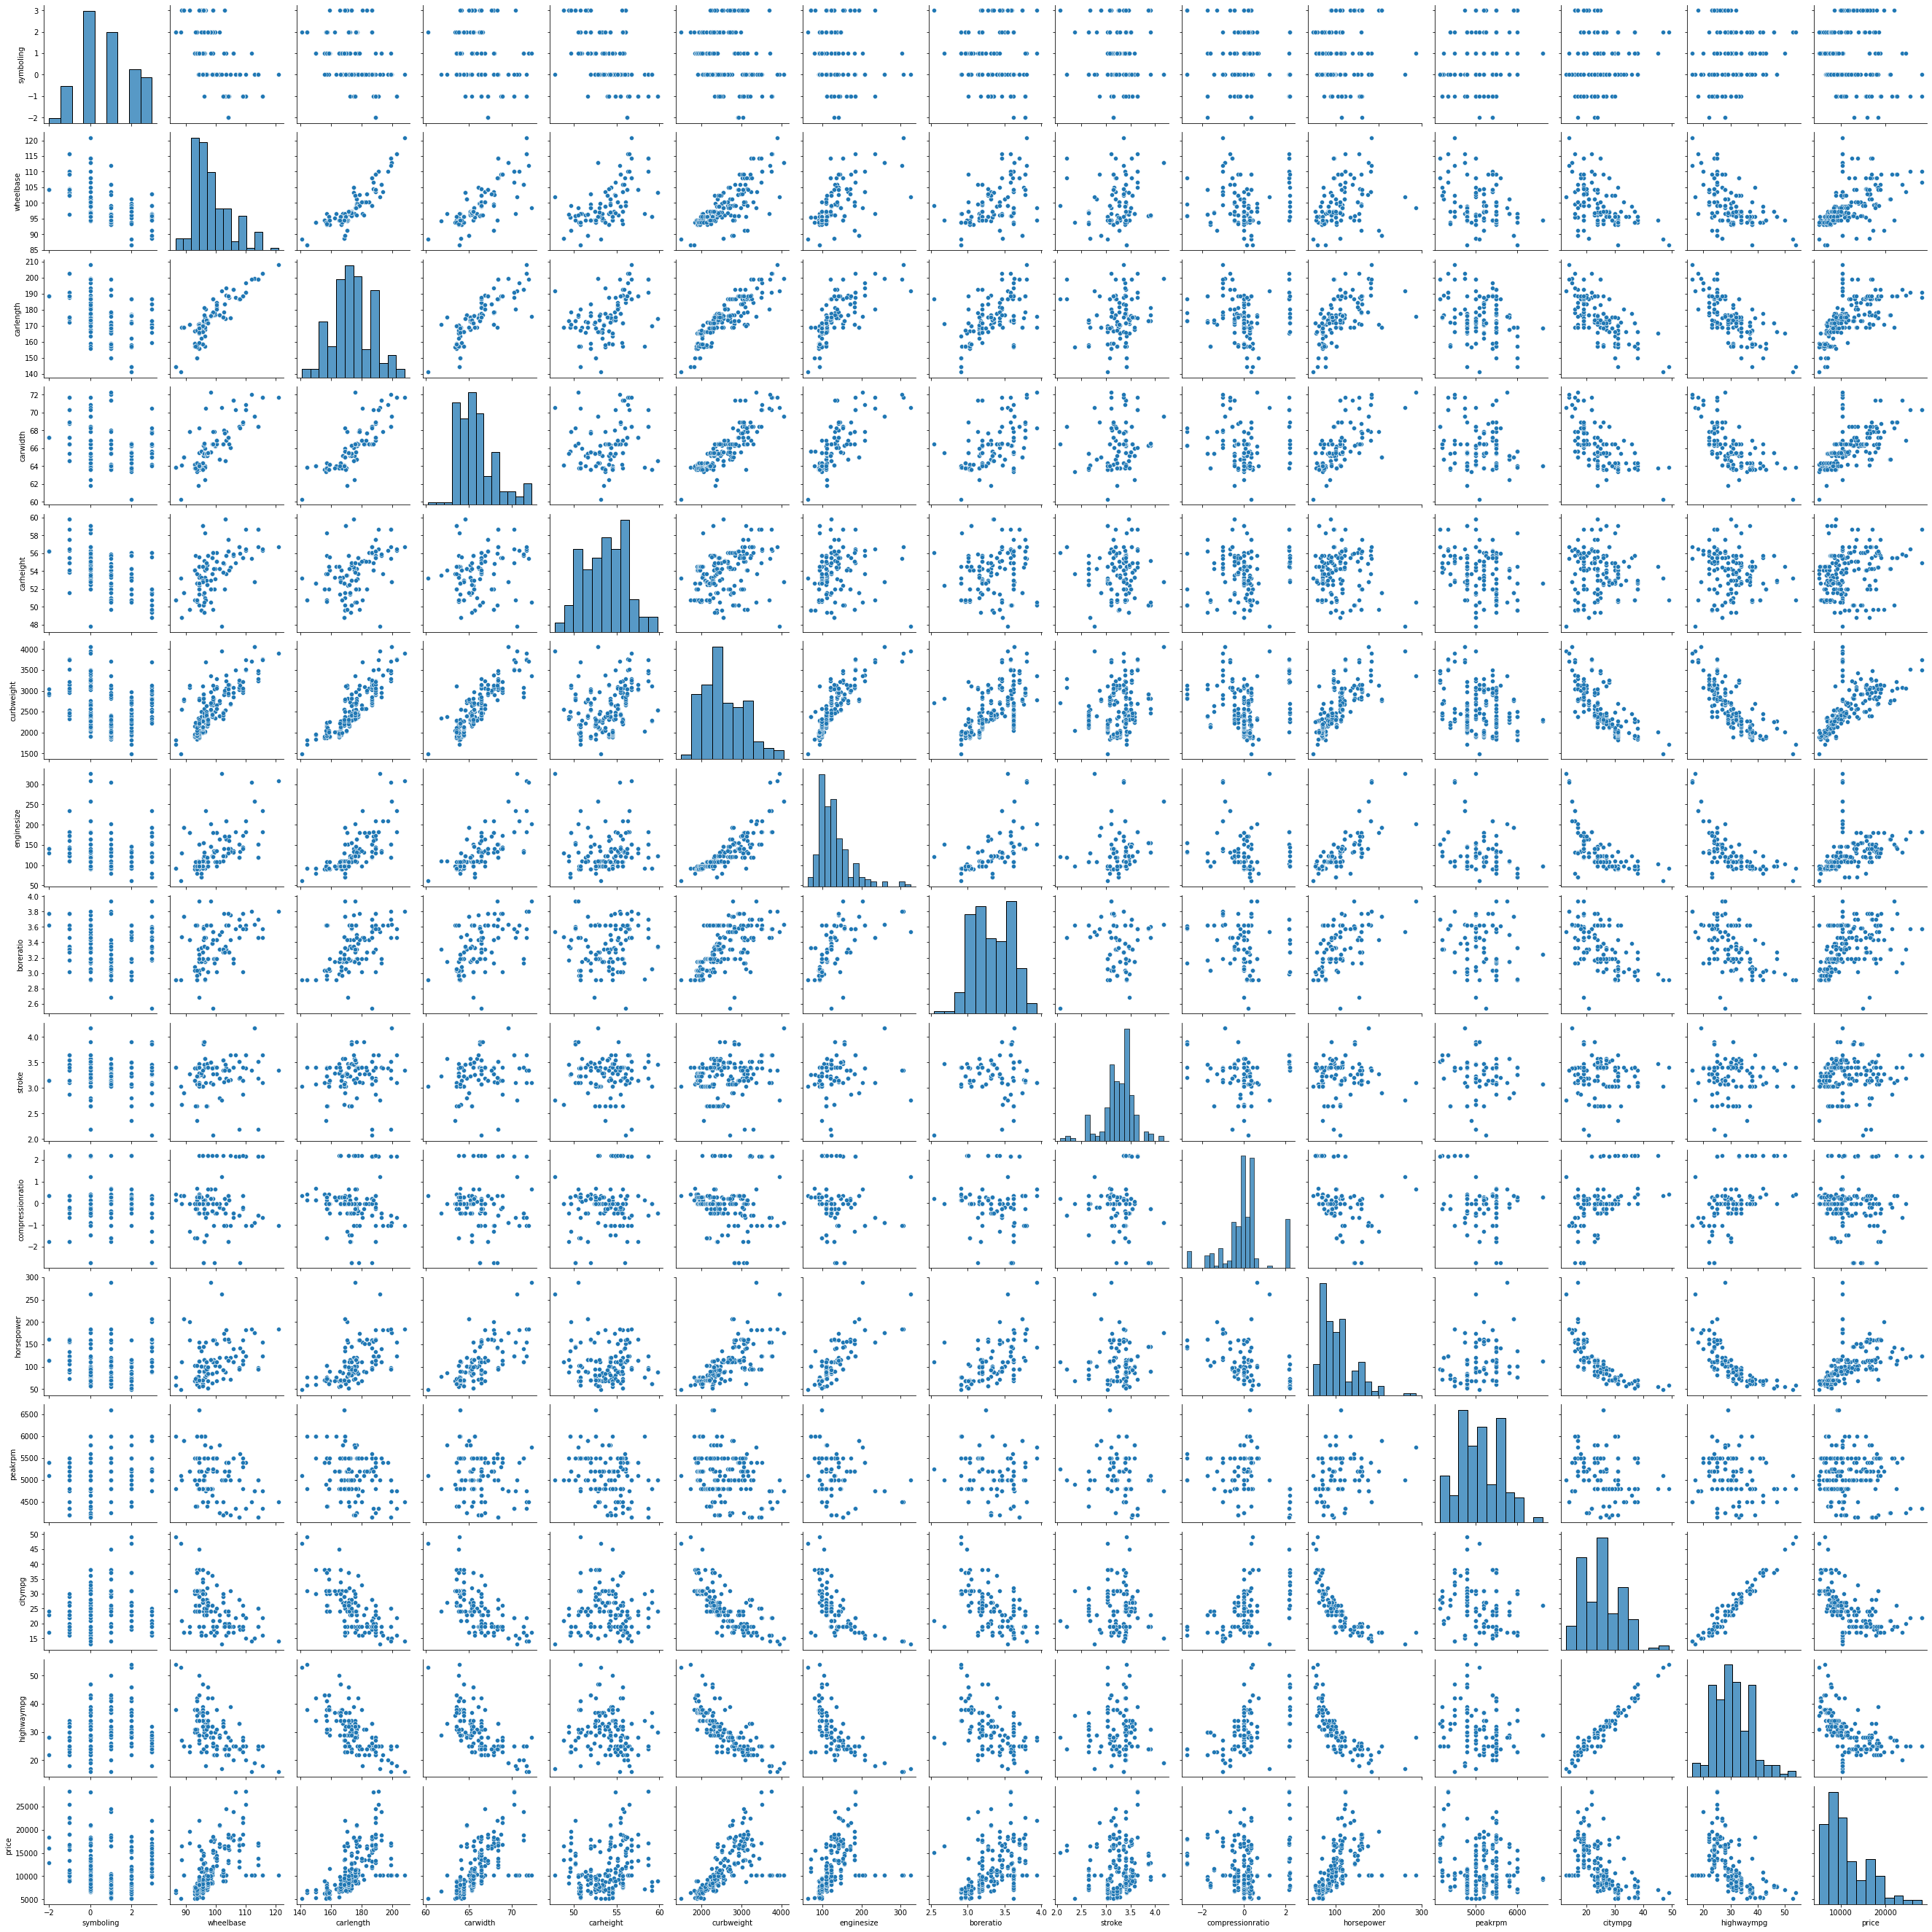

In [44]:
sns.pairplot(df)
plt.show()